In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [22]:
data = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [15]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [23]:
# Extracting useful numerical features
features = data[['SALES', 'QUANTITYORDERED']]


In [17]:
features = features.dropna()  # Remove rows with missing values


In [24]:
features

,SALES,QUANTITYORDERED
0,2871.00,30
1,2765.90,34
2,3884.34,41
3,3746.70,45
4,5205.27,49
...,...,...
2818,2244.40,20
2819,3978.51,29
2820,5417.57,43
2821,2116.16,34


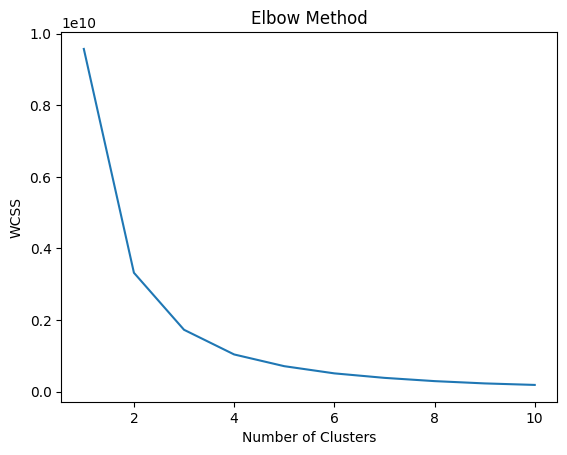

In [25]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []  # List to store the Within-Cluster Sum of Squares

for i in range(1, 11):  # Try clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the results to observe the "elbow"
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()


In [26]:
# Assume from the elbow plot we choose k = 3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)  # Assign cluster labels

print(data.head())  # Display first few rows with cluster assignments


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...          NaN   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          NaN   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          NaN   
3   8/25/2003 0:00  Shipped       3         8     2003  ...          NaN   
4  10/10/2003 0:00  Shipped       4        10     2003  ...          NaN   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022     U

The output you provided is a preview of a DataFrame (most likely from the pandas library in Python) that results from performing K-Means clustering on the sales_data_sample.csv dataset. Let’s break down the relevant parts of this output:

DataFrame Columns Explained
ORDERNUMBER: Unique identifier for each order. It allows you to track individual orders.

QUANTITYORDERED: The quantity of items ordered in each transaction. This is useful for understanding purchasing behavior and product demand.

PRICEEACH: The price per unit for the ordered item. This indicates how much each item costs individually.

ORDERLINENUMBER: An identifier for each line item in an order, which helps to track multiple items in a single order.

SALES: Total sales amount for that order line, calculated as QUANTITYORDERED * PRICEEACH. This is a critical metric for analyzing revenue.

ORDERDATE: The date when the order was placed. This can be used for time-series analysis and trends.

STATUS: The status of the order, e.g., “Shipped.” This informs about the order's processing stage.

QTR_ID, MONTH_ID, YEAR_ID: These fields represent the quarter, month, and year of the order date, which can help in temporal analysis.

ADDRESSLINE1, ADDRESSLINE2, CITY, STATE, POSTALCODE, COUNTRY, TERRITORY: These fields provide the address details for the order. They are useful for geographical analysis of sales.

CONTACTLASTNAME, CONTACTFIRSTNAME: Names of the contacts associated with the order, useful for customer relationship management.

DEALSIZE: Indicates the size of the deal (e.g., Small, Medium), which can be helpful for segmentation analysis.

Cluster: This column is newly added as a result of the K-Means clustering. Each order is assigned a cluster label (in this case, 0, 1, or 2), indicating which group the order belongs to based on the features you selected for clustering (in this example, SALES and QUANTITYORDERED).

Analysis of the Clusters
Cluster 0: The first few rows in the output belong to Cluster 0. This indicates that these orders share similar characteristics in terms of the features used for clustering, likely indicating lower sales and quantity ordered compared to the other clusters.

Cluster 1: This cluster label is not present in the output, indicating that either there were no orders assigned to this cluster in the sample you’re viewing, or it has not been shown in this specific view of the DataFrame.

Cluster 2: Rows with the Cluster label of 2 indicate higher sales or quantities ordered. The names and other attributes can be analyzed to find patterns or trends among orders in this cluster.

Conclusion
Overall, the output helps in identifying and segmenting orders into distinct groups based on sales performance. This can be valuable for marketing strategies, inventory management, and targeted sales efforts. By analyzing the clusters, you can uncover insights into which types of orders generate more revenue, which products are more popular, and how different factors correlate with sales outcomes.


